# EDA sur les données des collèges.
- analyse sur les données des collèges revue de la normalité
- corrélations visuelles sur les IPS et résultats du brevet. 


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv

In [2]:
import platform
a = platform.system()

In [3]:
if a == 'Windows':
    load_dotenv("./.env",  override=True)
else:
    load_dotenv( dotenv_path="./.env.local", override=True)
cleandata = os.environ.get("EXPORTDIR")

In [4]:
dfCol = pd.read_csv(os.path.join(cleandata, "IPS_colleges_2016_2023.csv"))
dfDnb = pd.read_csv(os.path.join(cleandata, "resultat_brevet_2016_2022.csv"))

In [7]:
# merge des résultat IPS et brevet
df = dfCol.merge(dfDnb, how='left', left_on=["UAI","annee de diplome"],right_on=["Numero d'etablissement","Session"])

<Axes: xlabel='IPS', ylabel='Taux de réussite'>

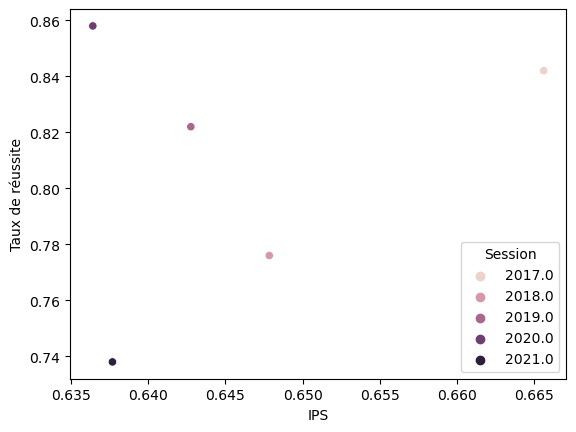

In [28]:
sns.scatterplot(df[df['UAI']=='0382035F'], x='IPS', y='Taux de réussite', hue='Session')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function a

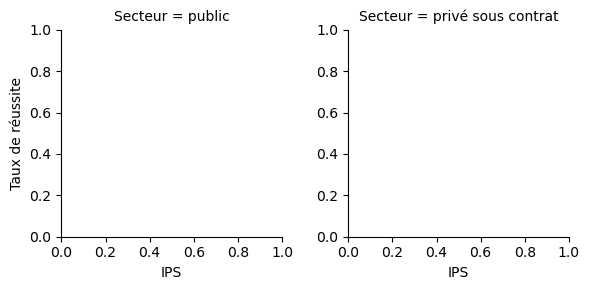

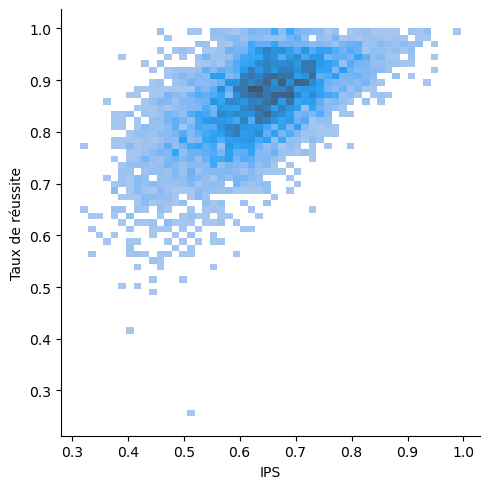

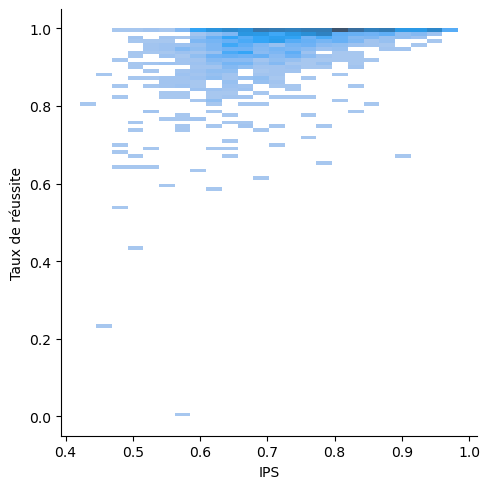

In [24]:
grid = sns.FacetGrid(df[df.Session == 2021], col='Secteur', sharey=False)
grid.map(sns.displot, 'IPS', 'Taux de réussite')
grid.fig.subplots_adjust(wspace=0.3)
plt.show()
# sns.displot(df[df.Session == 2021], x='IPS', y='Taux de réussite', hue='Secteur')